###### 1.Performing exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables.

In [65]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv') #loading the data set

In [67]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [68]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [69]:
#summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [71]:
#datatypes present in dataset
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [72]:
#checking of null values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [73]:
df.columns


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [74]:
df_encoded=pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


# visualizations

<Axes: >

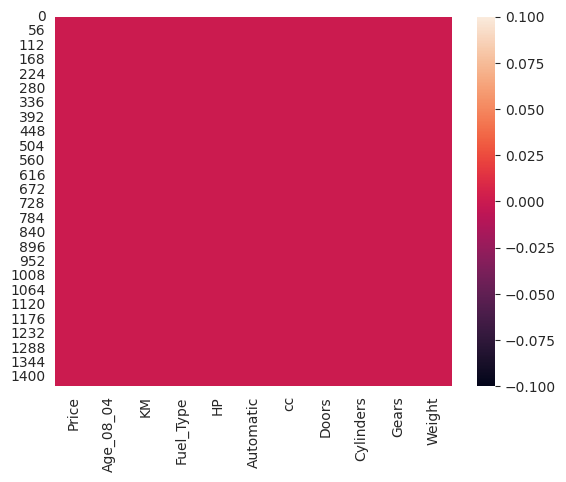

In [75]:
sns.heatmap(df.isnull())

In [76]:
for i in df.columns:
  if pd.api.types.is_numeric_dtype(df[i]):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Outliers are points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"Outliers for '{i}':\n{outliers}")

Outliers for 'Price':
     Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
7    18600         30  75889    Diesel   90          0  2000      3   
8    21500         27  19700    Petrol  192          0  1800      3   
10   20950         25  31461    Petrol  192          0  1800      3   
11   19950         22  43610    Petrol  192          0  1800      3   
12   19600         25  32189    Petrol  192          0  1800      3   
..     ...        ...    ...       ...  ...        ...   ...    ...   
182  21125          2    225    Petrol   97          0  1400      5   
183  21500          2     15    Petrol  110          0  1600      5   
184  17795          1      1    Petrol   98          0  1400      4   
185  18245          1      1    Petrol  110          0  1600      5   
523  18950         49  49568    Petrol  110          0  1600      3   

     Cylinders  Gears  Weight  
7            4      5    1245  
8            4      5    1185  
10           4      6    1185

In [77]:
#correlation matrix
cm=df.corr(numeric_only=True)
cm

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


<Axes: >

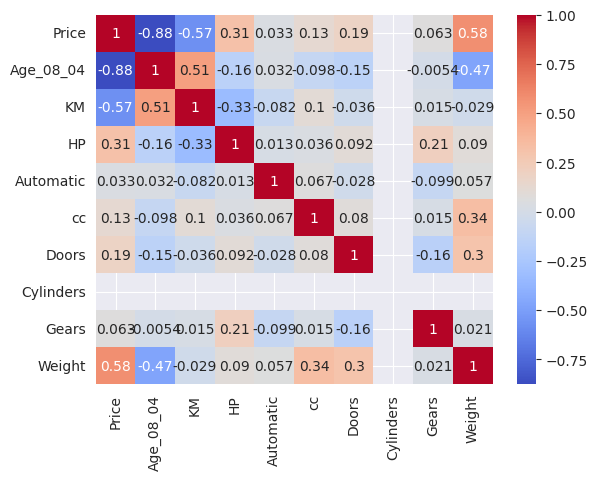

In [78]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

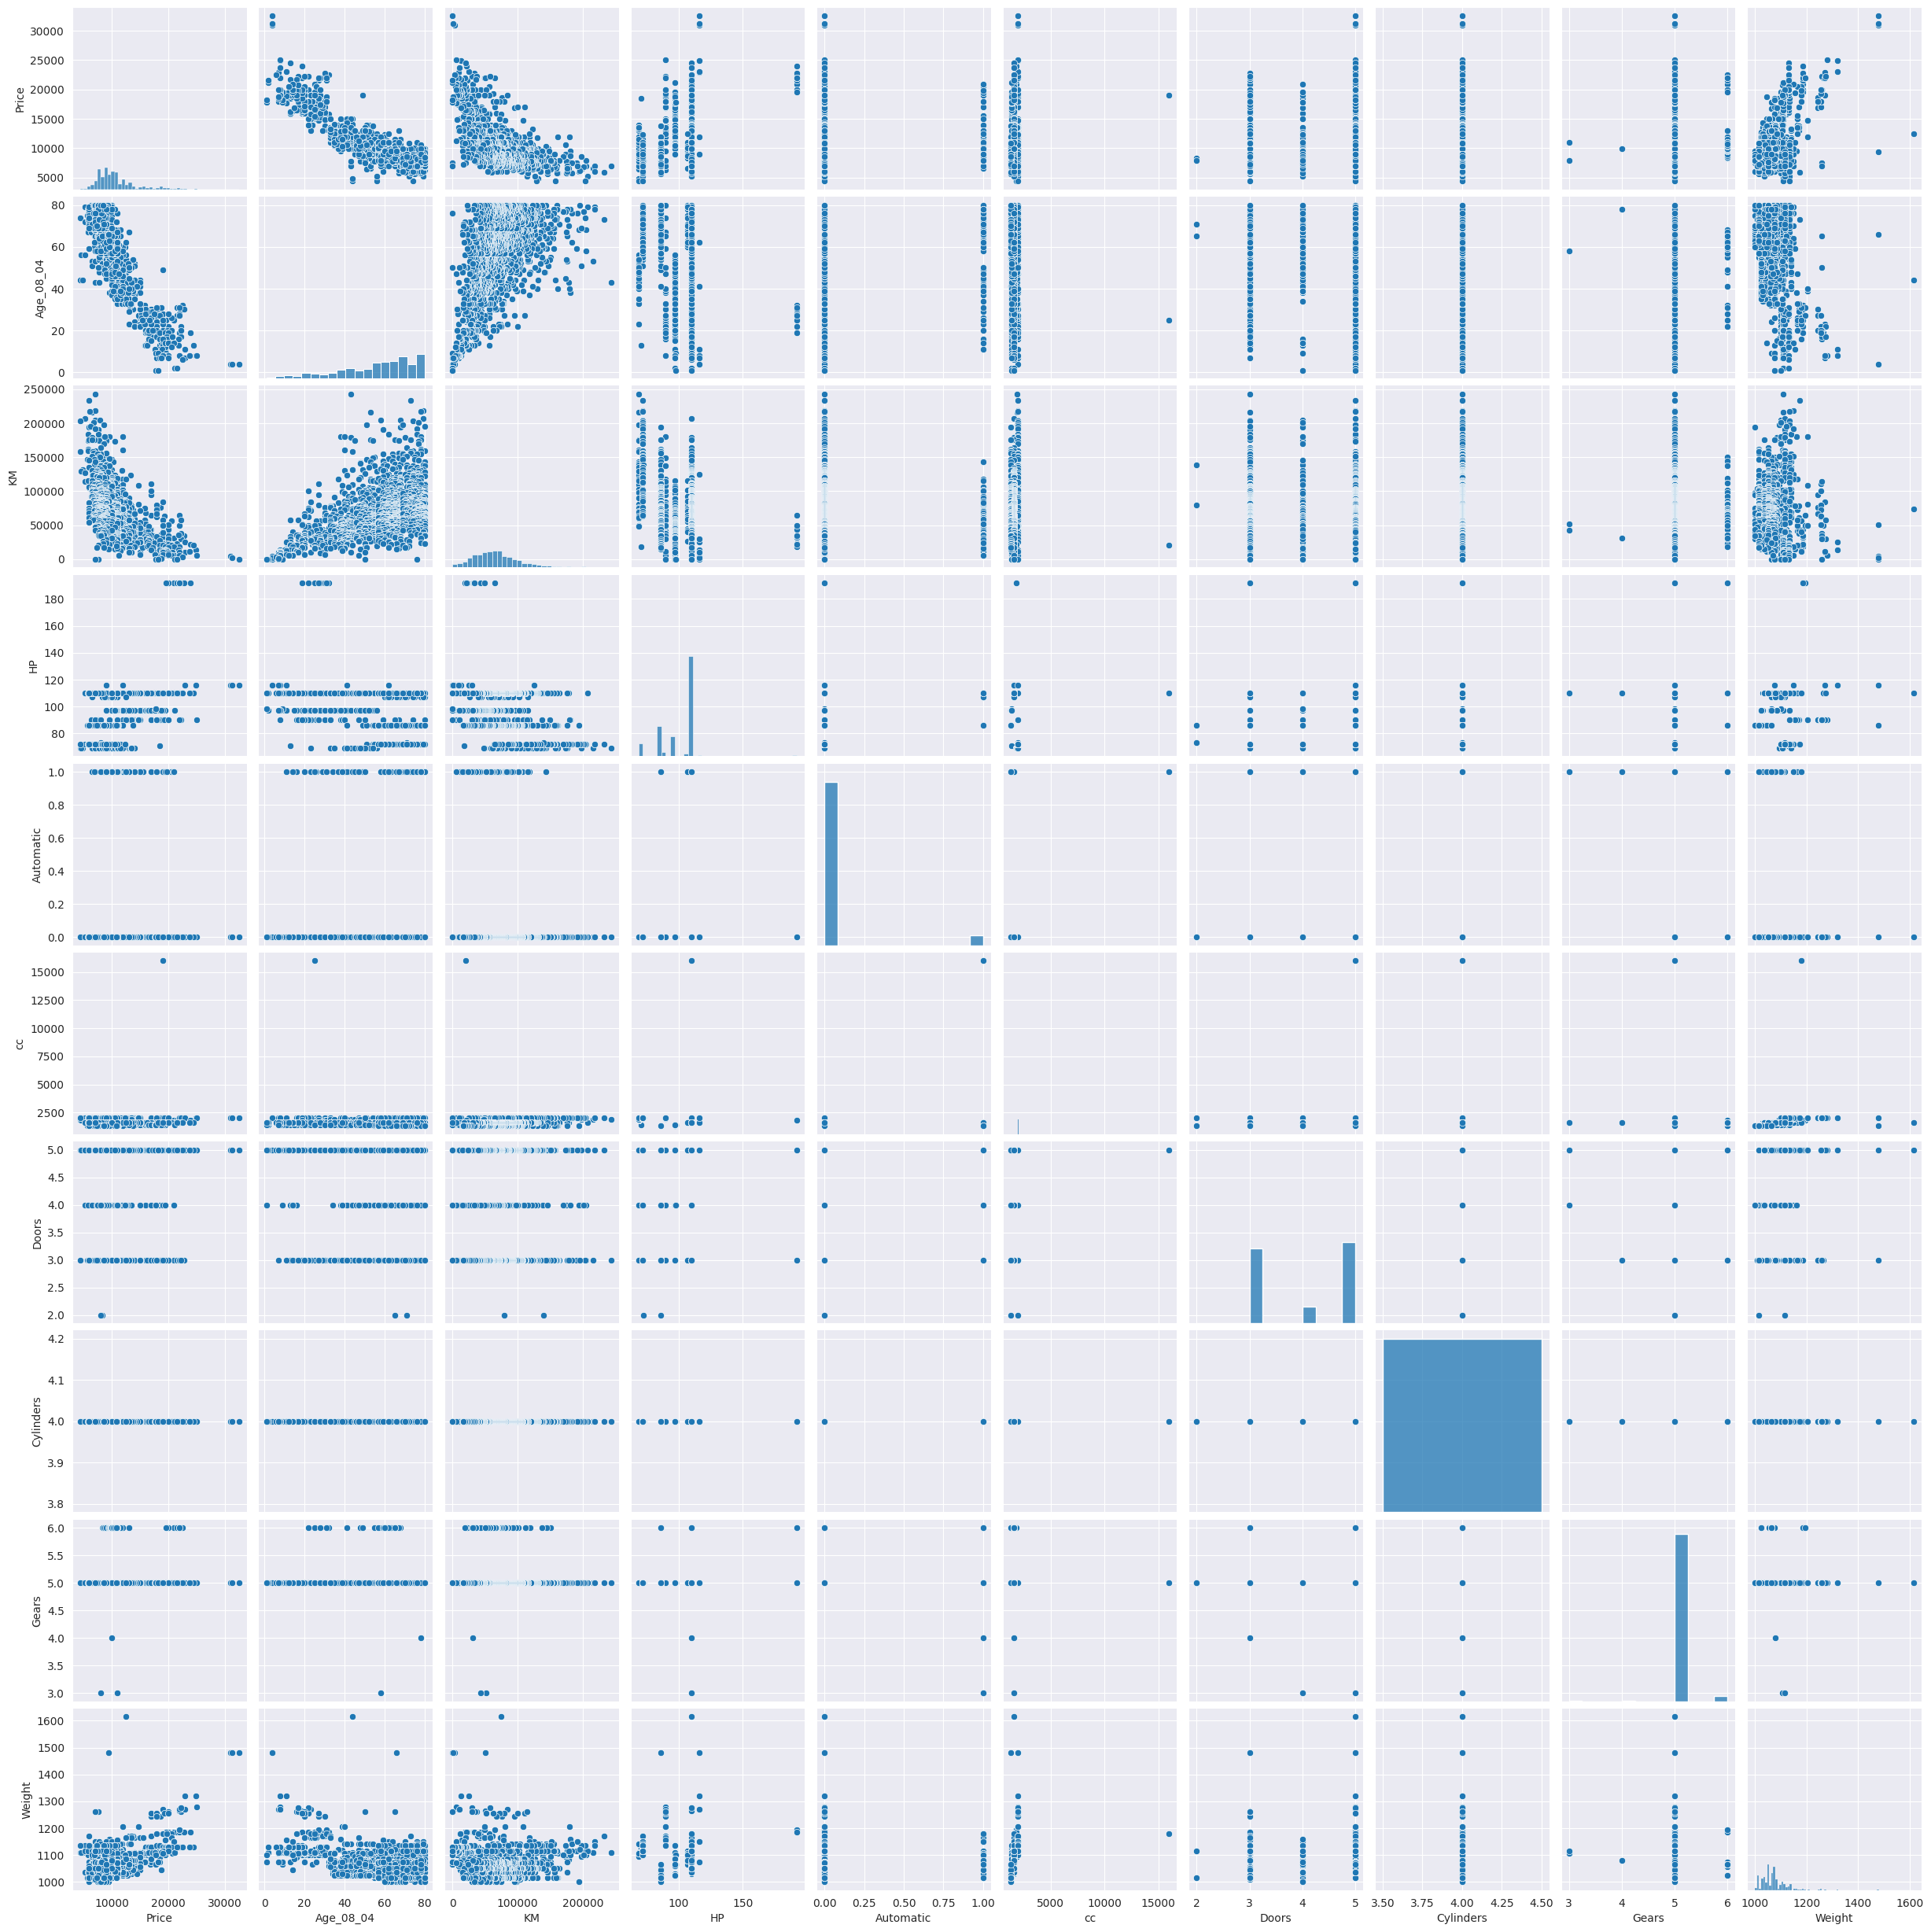

In [79]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

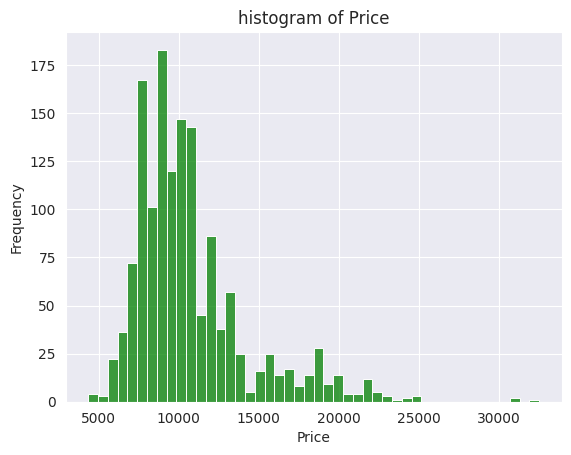

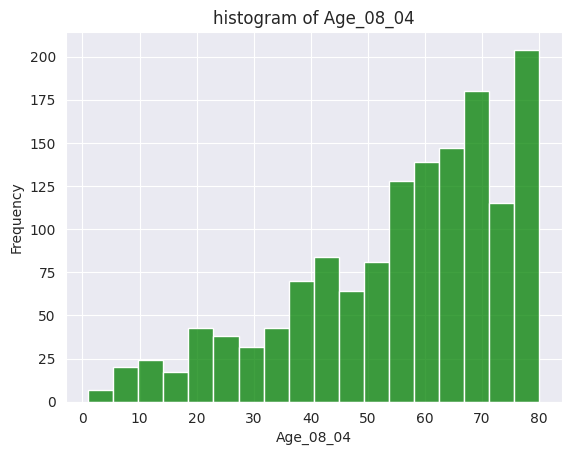

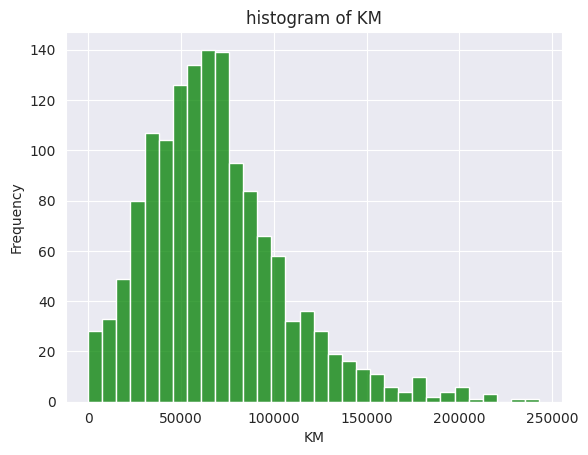

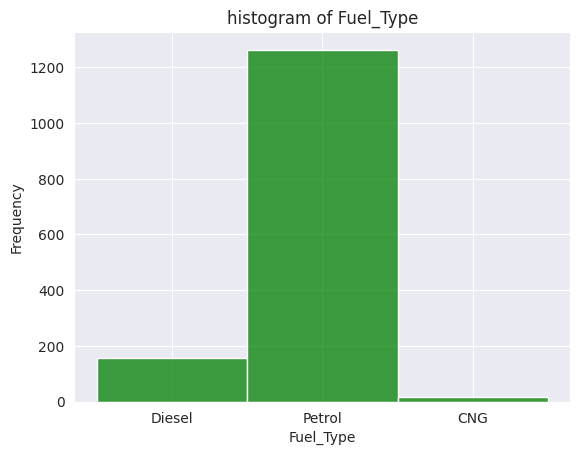

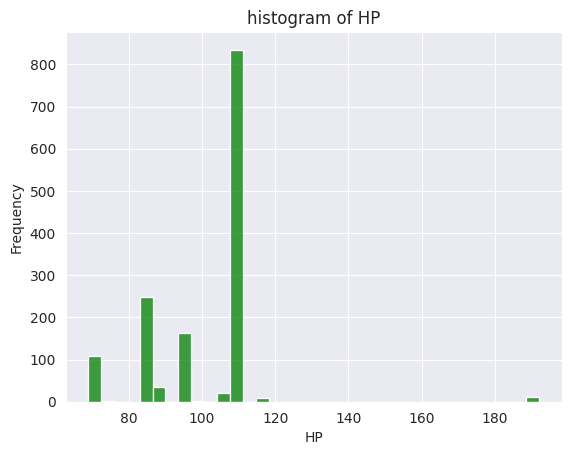

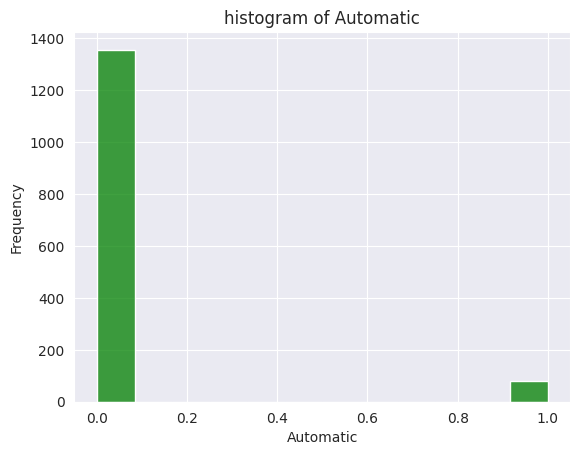

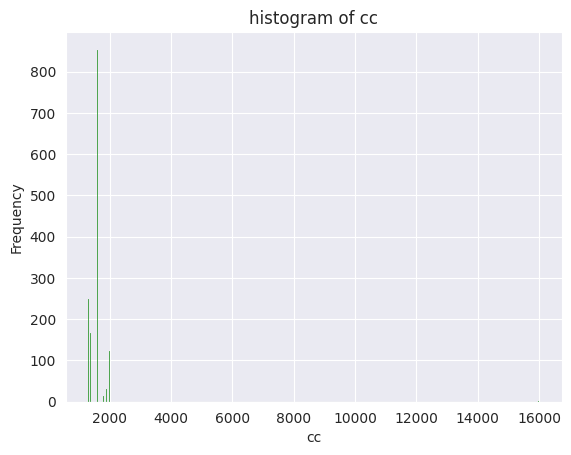

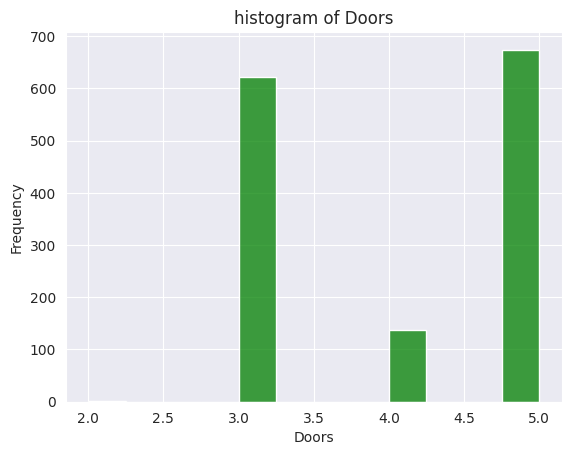

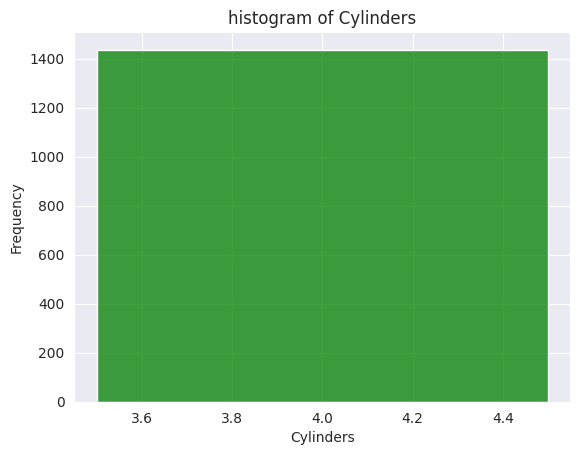

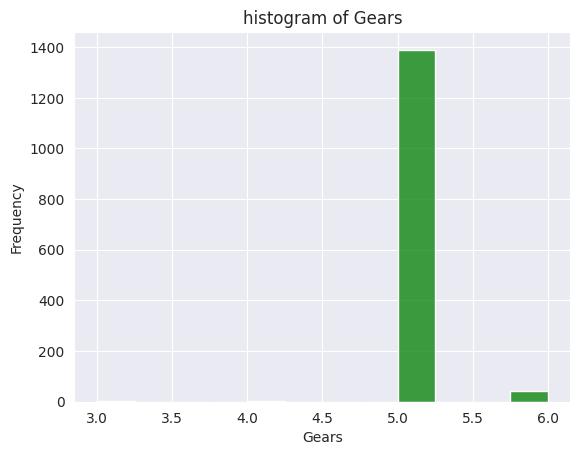

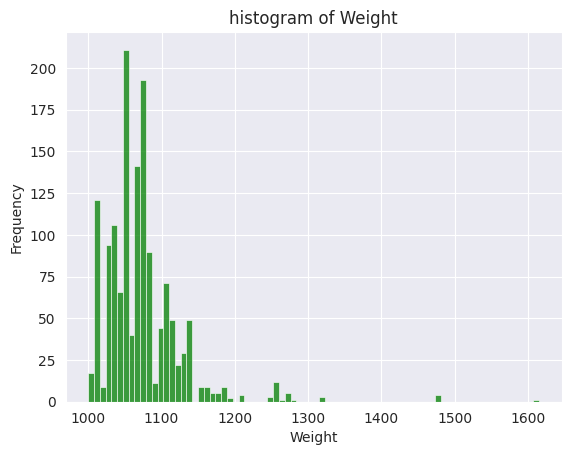

In [80]:
for i in df.columns:
  sns.histplot(df[i],color='green')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f"histogram of {i}")
  plt.show()

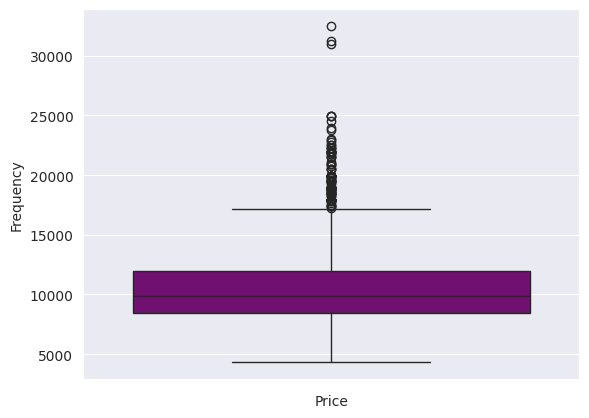

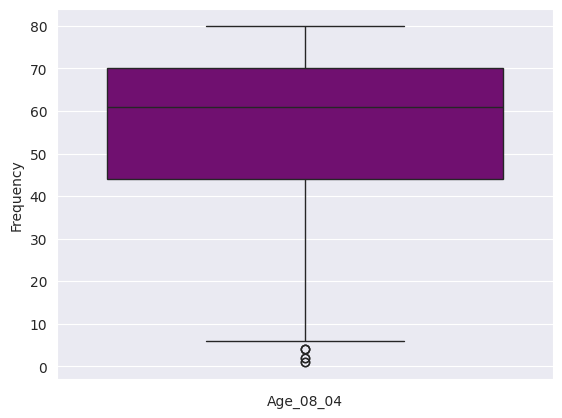

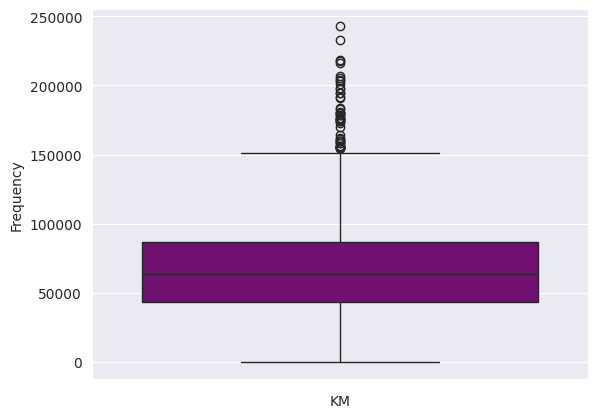

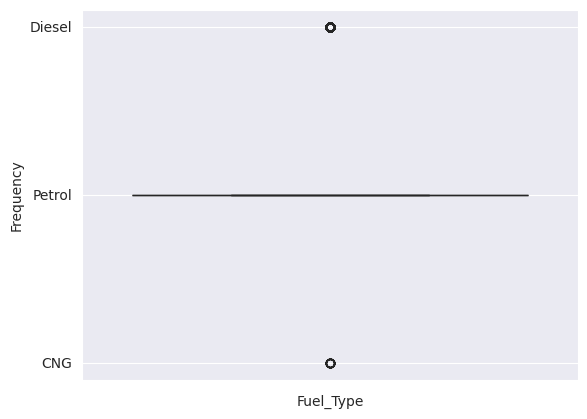

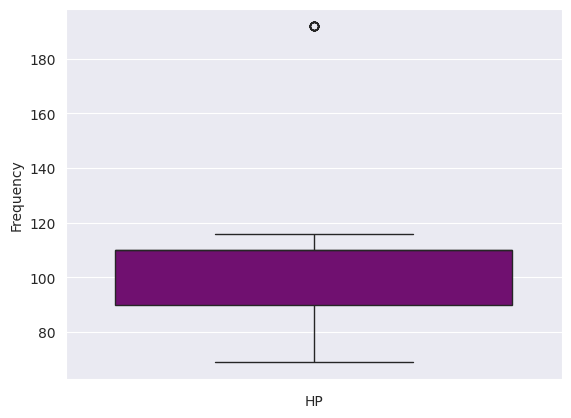

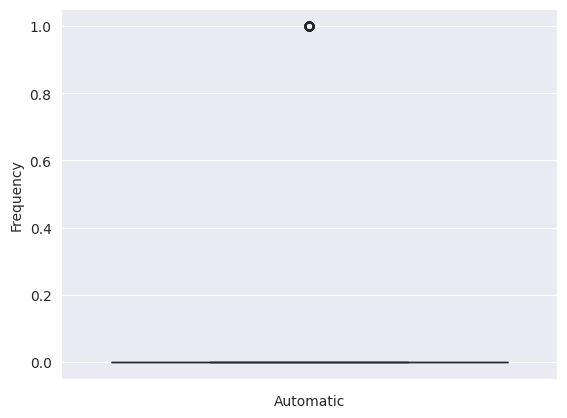

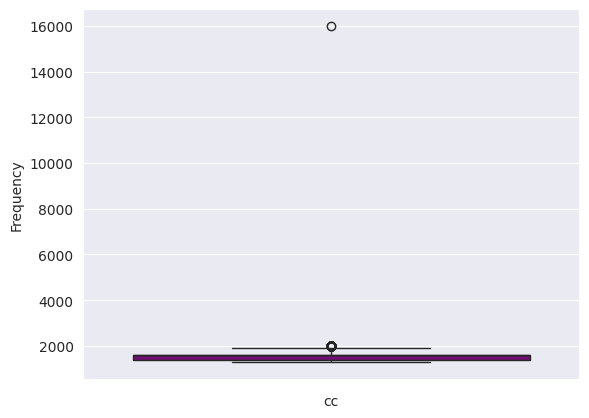

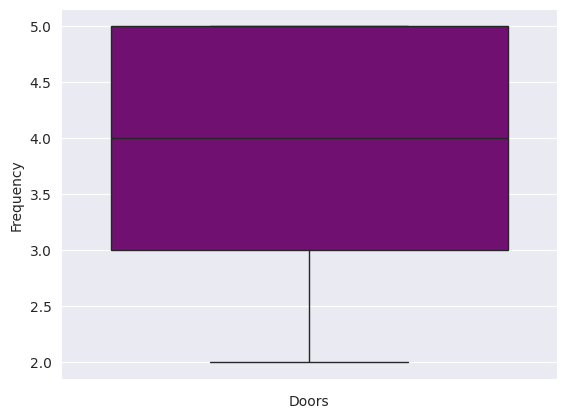

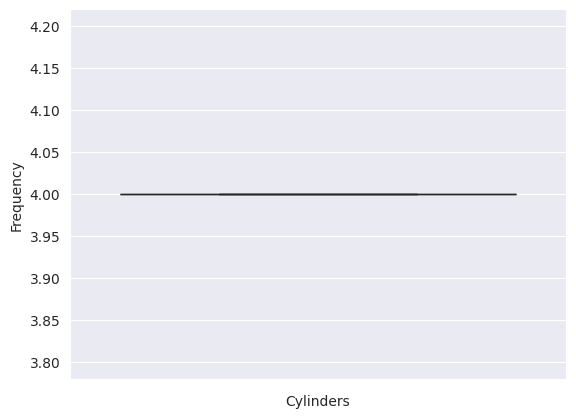

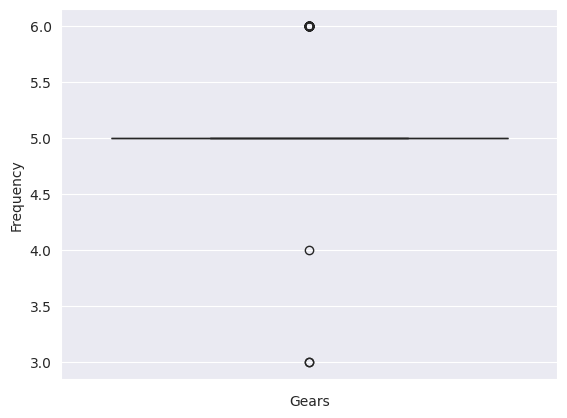

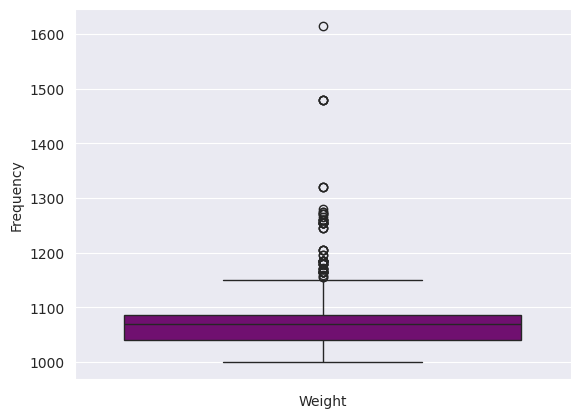

In [81]:
for i in df.columns:
  sns.boxplot(df[i],color='purple')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

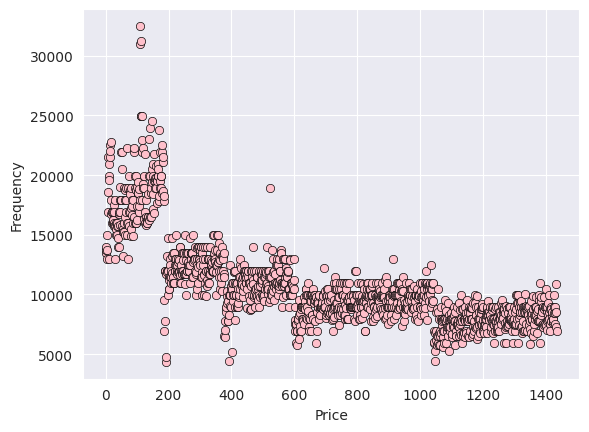

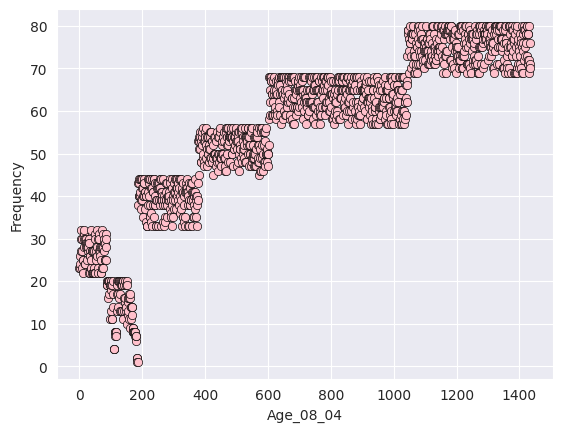

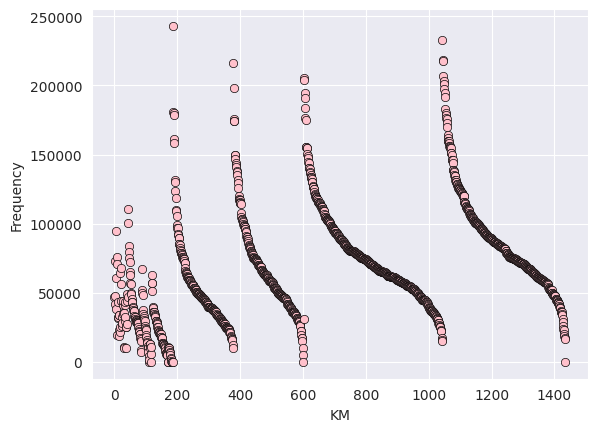

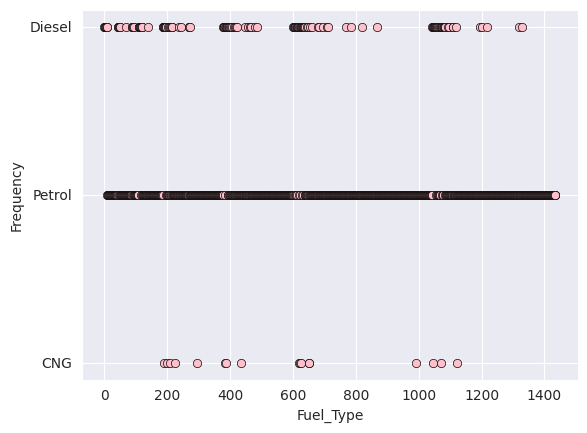

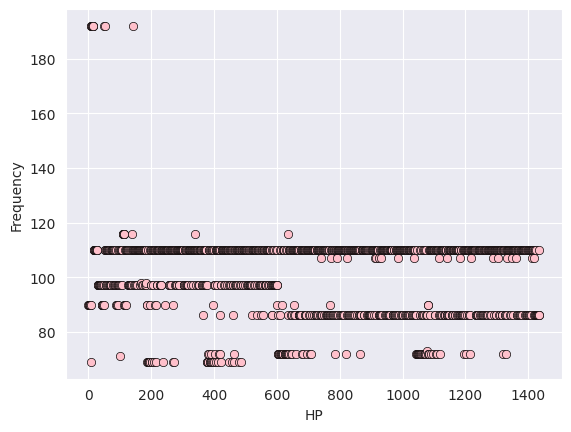

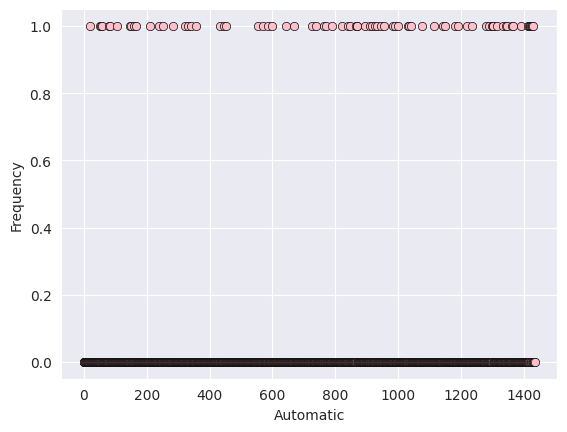

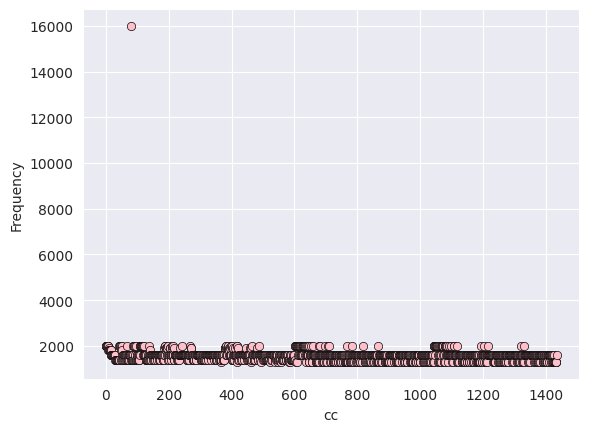

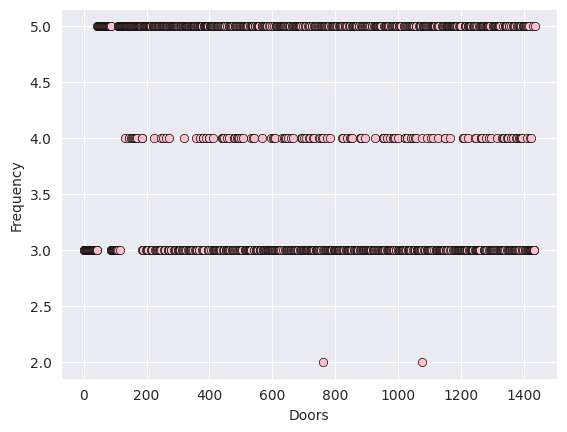

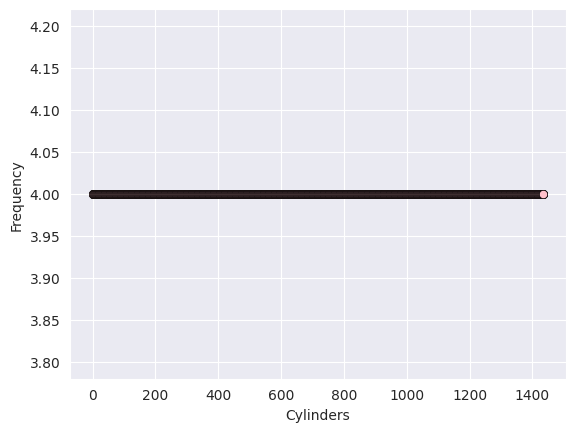

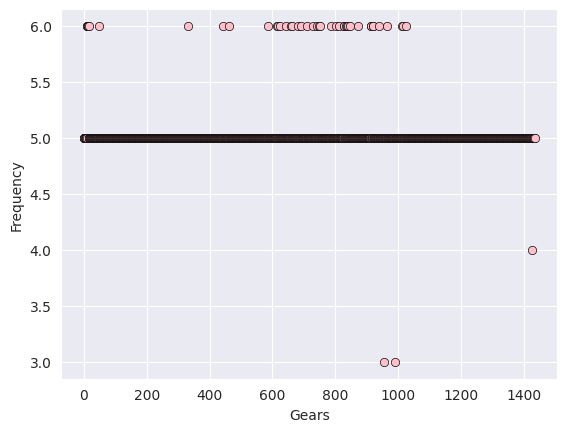

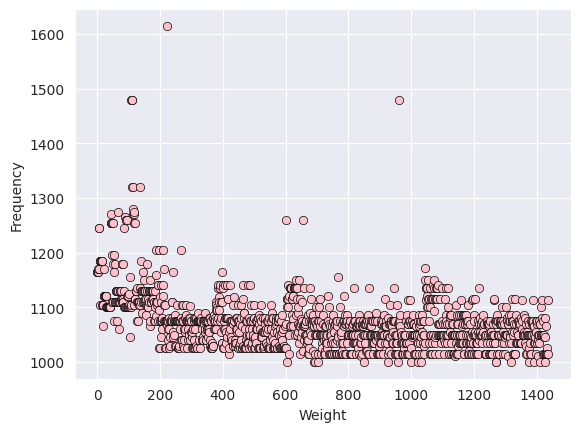

In [82]:
for i in df.columns:
  sns.scatterplot(df[i],color='pink',edgecolor='black')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_encoded)
scaled_data


array([[ 0.76376268, -1.77196633, -0.57469494, ...,  1.75856113,
         2.87480715, -2.71087388],
       [ 0.83271485, -1.77196633,  0.11745379, ...,  1.75856113,
         2.87480715, -2.71087388],
       [ 0.88787659, -1.71818412, -0.71538641, ...,  1.75856113,
         2.87480715, -2.71087388],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -1.09191497,
        -0.34784942,  0.36888474],
       [-0.96004167,  0.75579727, -1.37670303, ..., -1.09191497,
        -0.34784942,  0.36888474],
       [-1.04278428,  1.0784905 , -1.82784925, ...,  0.78939926,
        -0.34784942,  0.36888474]])

### importing the necessary libraries and models

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.formula.api as smf


In [85]:
#simple linear regression is done btw two variables
model=smf.ols("Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight+Cylinders",data=df).fit()
model

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:36:02   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -580.0605     89.968     -6.447      0.000    -756.544    -403.577
Fuel_Type[T.Diesel]   554.0543    382.722      1.448      0.148    -196.704    1304.813
Fuel_Type[T.Petrol]  1144.0966    338.650      3.378      0.001     479.792    1808.402
Age_08_04            -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                     -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                     23.5270      3.575      6.581      0.000      16.515      30.539
Automatic             300.2592    161.026      1.865      0.062     -15.614     616.133
cc                     -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors                 -30.3567     40.908     -0.742      0.458    -110.603      49.890
Gears                 622.7990    198.026      3.145      0.002     234.346    1011.252
Weight                 20.8174      1.218     17.090      0.000      18.428      23.207
Cylinders           -2320.2422    359.871     -6.447      0.000   -3026.175   -1614.309
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     2.01e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
model.rsquared

0.8649083778053923

In [88]:
model.rsquared_adj

0.8639603664215705

###### Pre processing of the data to apply the MLR. training-80%, testing-20%

In [89]:
X=df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']]
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:

model.score(X_train,y_train)

0.865901057312435

In [92]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Age_08_04,-1.207831e+02
KM,-1.998627e-02
HP,2.742911e+01
Automatic,3.712087e+02
cc,-1.135136e-01
Doors,7.535468e+00
Cylinders,3.183231e-12
Gears,6.264184e+02
Weight,1.984314e+01


In [93]:
#predicting on the test dataset
y_pred = model.predict(X_test)


In [94]:
y_pred

array([11290.38677383,  8887.73532137,  9491.25897406,  8926.56316642,
       10090.24432093,  7775.83017895,  8729.75905479,  8285.19658314,
       14096.30784748, 13157.82922915,  9340.0927607 ,  9318.75928858,
       12967.32232973, 13071.93456319,  9699.46046178,  8240.35424613,
       12278.98198845, 17437.2626913 ,  7233.65706984,  9166.39844447,
       12766.97617362, 17788.00661502,  7848.30829369, 10477.48072034,
        7382.21588111, 15960.16276751,  9950.55948712,  7191.79972605,
       15515.32551844, 14560.58897324,  8089.18947919,  9877.08441797,
        8494.1957541 , 10079.58773542, 10260.50348017,  7973.82036624,
        8860.49761181,  9944.09470183, 16216.16072752,  9442.34758059,
        9860.63374803,  9514.63919763,  7840.62027034,  5309.76609221,
        6752.71505632, 17014.2851122 ,  9410.07710417, 10657.357464  ,
        8729.51047126, 13535.15616812, 13043.11974071,  6305.33186509,
       14716.54194935, 16153.06673414,  5892.63186446,  7683.17449807,
      

In [95]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1970126.6288130241
R-squared: 0.8523452141908858


In [96]:
# Lasso model
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')

Lasso Mean Squared Error: 1970167.5456595074
Lasso R-squared: 0.8523421476021117


In [97]:
# Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 1970151.8337241486
Ridge R-squared: 0.8523433251621813


In [98]:
#interview questions-1
#NORMALIZATION: It is used for the samples of the data, convert them into unit form
#STANDARDIZATION: used for the features to convert them to the unit form in which mean=0,variance=1  both are same used to gradient based algorithms to improve convergence

In [99]:
#interview questions-2
#Techniques to address multicollinearity include removing highly correlated predictors,
#using principal component analysis (PCA), and applying regularization methods like Lasso and Ridge regression.
